# Lab 3 - report, Michał Błaszczak [245047]

# Task 1 (Grid search for double exponential smoothing (Holt’s method))

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import Holt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

### import data

In [2]:
df = pd.read_csv('IBM.csv', index_col='Date', parse_dates=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-02-01,6.978967,7.087317,6.978967,7.068196,1.577107,674670
1962-02-02,7.068196,7.112811,7.036329,7.112811,1.587062,533460
1962-02-05,7.112811,7.112811,6.985341,7.023582,1.567153,329490
1962-02-06,7.023582,7.036329,6.998088,7.029955,1.568787,274575
1962-02-07,7.036329,7.074570,7.036329,7.036329,1.570210,266730
...,...,...,...,...,...,...
1965-12-23,8.022626,8.022626,7.950924,7.950924,1.781072,301248
1965-12-27,7.966858,8.038560,7.966858,7.966858,1.784643,364008
1965-12-28,7.966858,8.002709,7.919057,8.002709,1.792672,382836


### choose 'Close' for further analysis

In [3]:
df = df['Close']

### set frequency to business days

In [13]:
df = df.asfreq('b')
df = df.ffill()
df.index

DatetimeIndex(['1962-02-01', '1962-02-02', '1962-02-05', '1962-02-06',
               '1962-02-07', '1962-02-08', '1962-02-09', '1962-02-12',
               '1962-02-13', '1962-02-14',
               ...
               '1965-12-17', '1965-12-20', '1965-12-21', '1965-12-22',
               '1965-12-23', '1965-12-24', '1965-12-27', '1965-12-28',
               '1965-12-29', '1965-12-30'],
              dtype='datetime64[ns]', name='Date', length=1021, freq='B')

### plot data

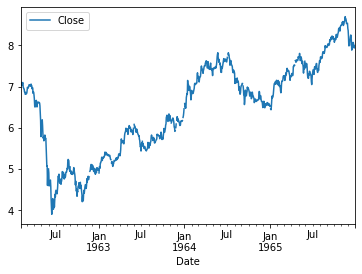

In [6]:
df.plot().legend()

### define DES function

0.005848543407022145

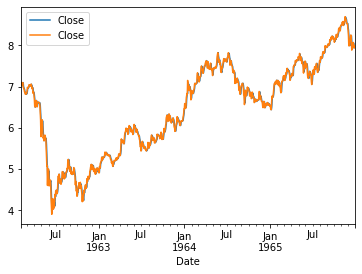

In [18]:
def DES(df, alpha, beta):    
    b_init = 7.068196 - 7.112811
    b = np.array([b_init, ])
    l = np.array([7.068196, ])
    y_array = np.array([7.068196, ])
    
    for i in range(0, 1020):
        y_t = df.iloc[i]
        l_t = alpha * y_t + (1 - alpha) * (l[i] + b[i])
        l = np.append(l, l_t)
        b_t = beta * (l_t - l[i]) + (1 - beta) * b[i]
        b = np.append(b, b_t)

        #y_value = l_t + i * b_t
        #y_array = np.append(y_array, y_value)

    index = df.index
    DES_df = pd.DataFrame(l, columns=['Close'])
    DES_df = DES_df.set_index(index)

    mse = mean_squared_error(DES_df, df)

    return mse

alpha = 0.8
beta = 0.2
DES(df, alpha, beta)

### create procedure and run it

In [196]:
MSEs = np.array([])
alphas = np.array([])
betas = np.array([])

for alpha in np.arange(0.01, 1.00, 0.01):
    for beta in np.arange(0.01, 1.00, 0.01):
        mse = DES(df, alpha, beta)
        MSEs = np.append(MSEs, mse)
        alphas = np.append(alphas, alpha)
        betas = np.append(betas, beta)   

        print('alpha:', alpha, '  beta:', beta) 

alpha: 0.01   beta: 0.01
alpha: 0.01   beta: 0.02
alpha: 0.01   beta: 0.03
alpha: 0.01   beta: 0.04
alpha: 0.01   beta: 0.05
alpha: 0.01   beta: 0.060000000000000005
alpha: 0.01   beta: 0.06999999999999999
alpha: 0.01   beta: 0.08
alpha: 0.01   beta: 0.09
alpha: 0.01   beta: 0.09999999999999999
alpha: 0.01   beta: 0.11
alpha: 0.01   beta: 0.12
alpha: 0.01   beta: 0.13
alpha: 0.01   beta: 0.14
alpha: 0.01   beta: 0.15000000000000002
alpha: 0.01   beta: 0.16
alpha: 0.01   beta: 0.17
alpha: 0.01   beta: 0.18000000000000002
alpha: 0.01   beta: 0.19
alpha: 0.01   beta: 0.2
alpha: 0.01   beta: 0.21000000000000002
alpha: 0.01   beta: 0.22
alpha: 0.01   beta: 0.23
alpha: 0.01   beta: 0.24000000000000002
alpha: 0.01   beta: 0.25
alpha: 0.01   beta: 0.26
alpha: 0.01   beta: 0.27
alpha: 0.01   beta: 0.28
alpha: 0.01   beta: 0.29000000000000004
alpha: 0.01   beta: 0.3
alpha: 0.01   beta: 0.31
alpha: 0.01   beta: 0.32
alpha: 0.01   beta: 0.33
alpha: 0.01   beta: 0.34
alpha: 0.01   beta: 0.350000000

### find alpha, beta corresponding to the smallest MSE

In [201]:
min_mse = np.min(MSEs)
index = np.where(MSEs == min_mse)
alpha = alphas[index]
beta = betas[index]

print('alpha:', alpha[0])
print('beta:', beta[0])

alpha: 0.01
beta: 0.01


### compare build model with the implemented one

In [200]:
fitHolt = Holt(df, exponential=False).fit()
alpha = fitHolt.params['smoothing_level']
beta = fitHolt.params['smoothing_trend']

print('alpha:', round(alpha, 4))
print('beta:', round(beta, 15))

alpha: 1.0
beta: 1.55e-13


<AxesSubplot:xlabel='Date'>

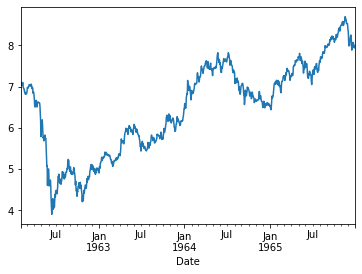

In [190]:
df.plot()

# Task 2 (Triple exponential smoothing (Holt-Winters’ method))

In [92]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

### import data

In [64]:
df = pd.read_csv('USGas.csv', header=None)
index = pd.date_range(start="2000-01", end="2019-11", freq="M")
df = df.set_index(index)
df.columns = ['US Gas']
df

,US Gas
2000-01-31,2510.5
2000-02-29,2330.7
2000-03-31,2050.6
2000-04-30,1783.3
2000-05-31,1632.9
...,...
2019-06-30,2115.2
2019-07-31,2407.5
2019-08-31,2437.2
2019-09-30,2215.6


### divide data into train and test sets

In [79]:
train_data = df.iloc[:226]
test_data = df.iloc[226:]
len(test_data)

12

### inspect data

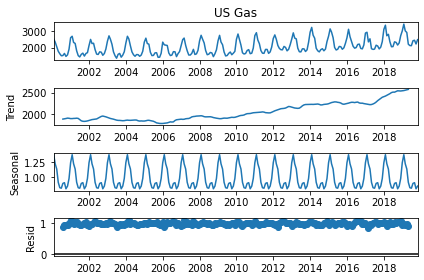

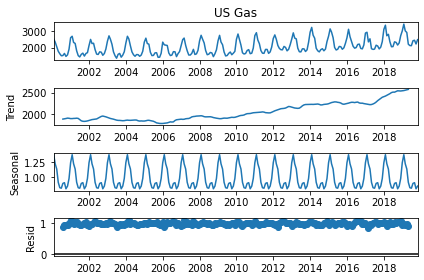

In [77]:
resultSeasonal = seasonal_decompose(x=df['US Gas'], model='multiplicative')
resultSeasonal.plot()

### fit data with Holt-Winter Exponential Smoothing model

In [80]:
type1 = "Trend and seasonal components are additive"
fit1 = ExponentialSmoothing(
    train_data,
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

fcast1 = fit1.forecast(len(test_data)).rename('ES predict')

In [81]:
type2 = "Additive trend and multiplicative seasonal component"
fit2 = ExponentialSmoothing(
    train_data,
    seasonal_periods=12,
    trend="add",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

fcast2 = fit2.forecast(len(test_data)).rename('ES predict')

In [82]:
type3 = "Multiplicative trend and additive seasonal component"
fit3 = ExponentialSmoothing(
    train_data,
    seasonal_periods=12,
    trend="mul",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

fcast3 = fit3.forecast(len(test_data)).rename('ES predict')

In [83]:
type4 = "Trend and seasonal components are multiplicative"
fit4 = ExponentialSmoothing(
    train_data,
    seasonal_periods=12,
    trend="mul",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

fcast4 = fit4.forecast(len(test_data)).rename('ES predict')

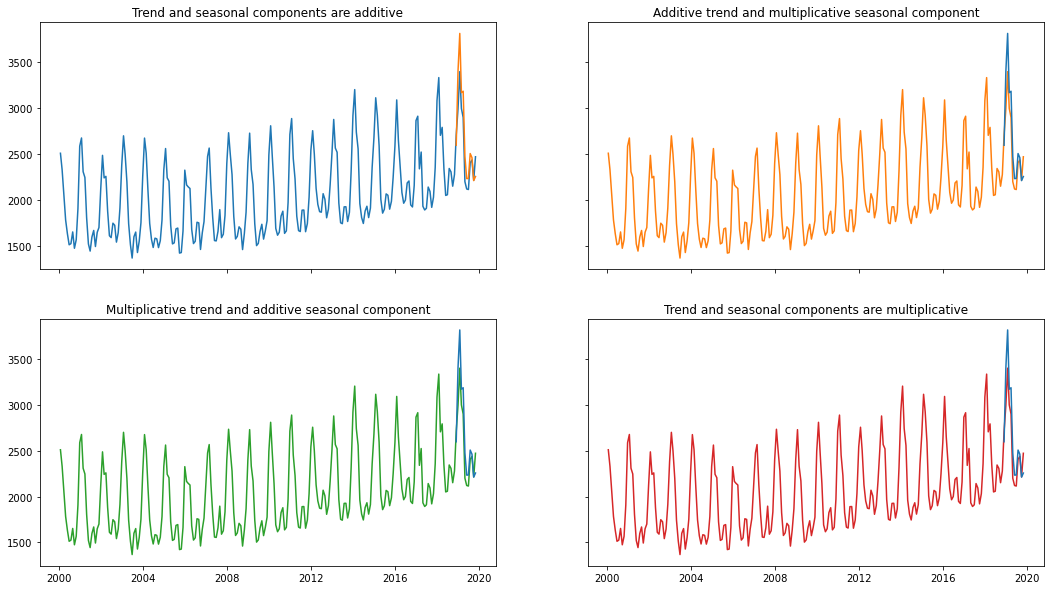

In [84]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.0, 10.0)

axs[0, 0].plot(df)
axs[0, 0].plot(fcast1)
axs[0, 0].set_title(type1)

axs[0, 1].plot(df, 'tab:orange')
axs[0, 1].plot(fcast2)
axs[0, 1].set_title(type2)

axs[1, 0].plot(df, 'tab:green')
axs[1, 0].plot(fcast3)
axs[1, 0].set_title(type3)

axs[1, 1].plot(df, 'tab:red')
axs[1, 1].plot(fcast4)
axs[1, 1].set_title(type4)

for ax in axs.flat:
    ax.label_outer()

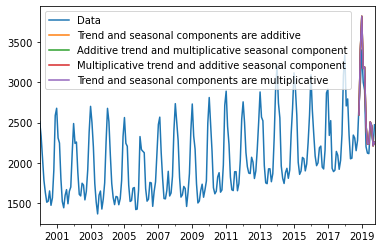

In [85]:
ax = df.plot()
fcast1.plot(ax=ax)
fcast2.plot(ax=ax)
fcast3.plot(ax=ax)
fcast4.plot(ax=ax)
ax.legend(['Data', type1, type2, type3, type4])

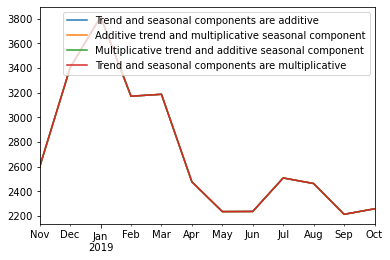

In [86]:
ax = fcast1.plot()
fcast2.plot(ax=ax)
fcast3.plot(ax=ax)
fcast4.plot(ax=ax)
ax.legend([type1, type2, type3, type4])

### can you deduce the character of trend and seasonal components?

In [65]:
# they seem to be additive

### compare the forecasting accuracy for different combinations of trend and seasonal parameters

In [96]:
arr = [type1, type2, type3, type4]
models = [fit1, fit2, fit3, fit4]
fcasts = [fcast1, fcast2, fcast3, fcast4]
for i, type in zip([0,1,2,3], arr):
    print('\n', type)
    # print('\tsmoothing_level', round(models[i].params['smoothing_level'], 4))
    # print('\tsmoothing_trend', round(models[i].params['smoothing_trend'], 10))
    # print("\t----------------")
    mape = mean_absolute_percentage_error(test_data, fcasts[i])*100
    print('\tMAPE', round(mape, 4))
    mae = mean_absolute_error(test_data, fcasts[i])
    print('\tMAE', round(mae, 4))
    mse = mean_squared_error(test_data, fcasts[i])
    print('\tMSE', round(mse, 4))


 Trend and seasonal components are additive
	MAPE 6.93
	MAE 187.2079
	MSE 52005.9412

 Additive trend and multiplicative seasonal component
	MAPE 6.9328
	MAE 187.2881
	MSE 52052.9668

 Multiplicative trend and additive seasonal component
	MAPE 6.9285
	MAE 187.1691
	MSE 51986.7964

 Trend and seasonal components are multiplicative
	MAPE 6.9312
	MAE 187.247
	MSE 52032.6763
